# Explore models of semantic similarity

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as sd
from sklearn import manifold
import pandas as pd
from mindstorm import dsmplot
from psifr import fr
from cfr import task
from cymr import cmr
import importlib

res_dir = Path(os.environ['CFR_RESULTS'])
fig_dir = Path(os.environ['CFR_FIGURES']) / 'patterns'
fig_dir.mkdir(exist_ok=True)

## Plot distributional patterns

In [2]:
patterns = cmr.load_patterns(res_dir / 'cfr_patterns.hdf5')

In [3]:
pool = pd.read_csv(res_dir / 'stimuli' / 'pool_cfr.csv')
images = task.load_pool_images(pool, res_dir / 'stimuli' / 'pool_lores')

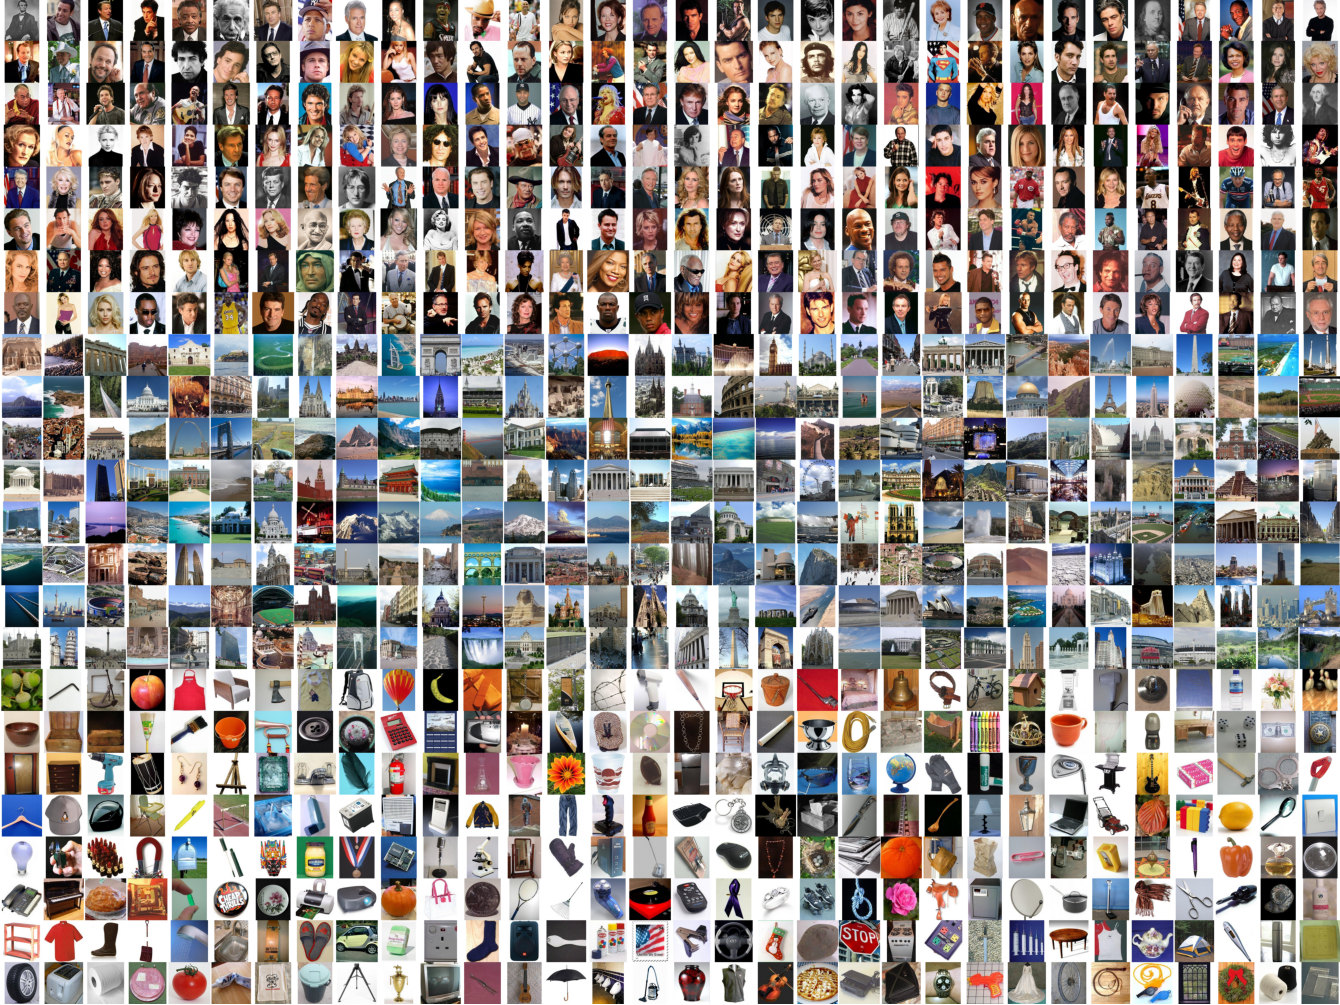

In [4]:
mat = dsmplot.image_matrix(list(images.values()), shape=(24, 32))
fig, ax = plt.subplots(figsize=(24, 32))
ax.imshow(mat)
ax.set_axis_off()
fig.savefig(fig_dir / f'stim_matrix.png', pad_inches=0)

In [5]:
vectors = patterns['vector']['use']
dsm_use = sd.squareform(sd.pdist(vectors, 'correlation'))

In [6]:
np.percentile(sd.squareform(1 - dsm_use, checks=False), (1, 99))

array([0.05860081, 0.64785444])

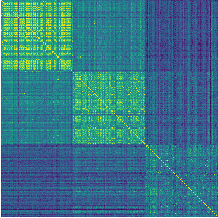

In [7]:
fig, ax = plt.subplots(figsize=(4, 4));
h = dsmplot.plot_dsm(1 - dsm_use, vlim=(0, .7), ax=ax, checks=False);
fig.savefig(fig_dir / f'rsm_use.png', pad_inches=0)

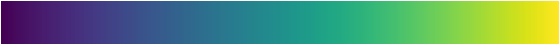

In [8]:
x = np.linspace(0, 0.7, 1024)
a = np.tile(x, (80, 1))
fig, ax = plt.subplots(figsize=(10, 1))
ax.matshow(a)
ax.set_axis_off()
fig.savefig(fig_dir / 'colorbar.png', pad_inches=0)

## Plot t-SNE embedding

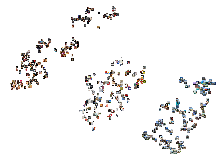

In [9]:
embedding = manifold.TSNE(
    n_components=2, perplexity=6, n_iter=5000, n_iter_without_progress=500
)
all_images = list(images.values())

fig, ax = plt.subplots(figsize=(4, 4))
dsmplot.plot_mds(dsm_use, all_images, zoom=0.0075, ax=ax, embedding=embedding);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / f'stim_tsne.png', dpi=4000, pad_inches=0)

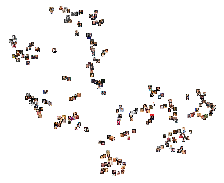

In [10]:
embedding = manifold.TSNE(
    n_components=2, perplexity=6, n_iter=5000, n_iter_without_progress=500
)

importlib.reload(dsmplot)
fig, ax = plt.subplots(figsize=(4, 4))
dsmplot.plot_mds(dsm_use, all_images, ind=slice(None, 256), zoom=0.0125, ax=ax, embedding=embedding);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / f'stim_tsne_cel.png', dpi=4000, pad_inches=0)

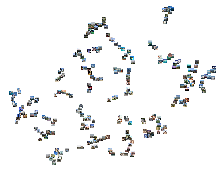

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
dsmplot.plot_mds(dsm_use, all_images, ind=slice(256, 512), zoom=0.0125, ax=ax, embedding=embedding);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / f'stim_tsne_loc.png', dpi=4000, pad_inches=0)

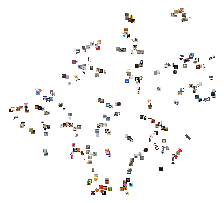

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
dsmplot.plot_mds(dsm_use, all_images, ind=slice(512, None), zoom=0.0125, ax=ax, embedding=embedding);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / f'stim_tsne_obj.png', dpi=4000, pad_inches=0)

## Plot patterns for a sample list

In [13]:
data = task.read_study_recall(res_dir / 'cfr_eeg_mixed.csv')

In [14]:
l1 = fr.filter_data(data, subjects=[1], lists=[2], trial_type='study')
l1

,subject,list,position,trial_type,item,item_index,session,list_type,category,response,response_time,list_category,block,n_block,block_pos,block_len,curr,prev,base
0,1,2,1,study,SEAN PENN,228,1,mixed,cel,3.0,1.255,mixed,1,6,1,2,cel,NaN,NaN
1,1,2,2,study,AUDREY HEPBURN,19,1,mixed,cel,3.0,1.040,mixed,1,6,2,2,cel,NaN,NaN
2,1,2,3,study,ST PATRICKS CATHEDRAL,463,1,mixed,loc,2.0,1.164,mixed,2,6,1,4,loc,cel,obj
3,1,2,4,study,LES INVALIDES,364,1,mixed,loc,2.0,0.829,mixed,2,6,2,4,loc,cel,obj
4,1,2,5,study,GREAT ZIMBABWE RUINS,340,1,mixed,loc,3.0,0.872,mixed,2,6,3,4,loc,cel,obj
5,1,2,6,study,BRYCE CANYON,281,1,mixed,loc,2.0,1.241,mixed,2,6,4,4,loc,cel,obj
6,1,2,7,study,TROPHY,745,1,mixed,obj,3.0,0.862,mixed,3,6,1,2,obj,loc,cel
7,1,2,8,study,BRUSH,548,1,mixed,obj,3.0,0.779,mixed,3,6,2,2,obj,loc,cel
8,1,2,9,study,SUPREME COURT,469,1,mixed,loc,2.0,1.245,mixed,4,6,1,4,loc,obj,cel
9,1,2,10,study,SAN FRANCISCO,444,1,mixed,loc,4.0,0.854,mixed,4,6,2,4,loc,obj,cel


In [15]:
item_index = l1['item_index'].to_numpy() - 1
loc = patterns['vector']['loc'][item_index]
cat = patterns['vector']['cat'][item_index]
use = patterns['vector']['use'][item_index]

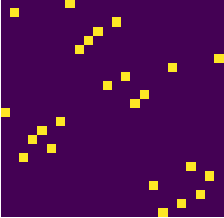

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
include = np.any(loc, 0)
ax.pcolor(loc[:, include])
ax.invert_yaxis()
ax.axis('off');
fig.savefig(fig_dir / 'pattern_loc.png', pad_inches=0)

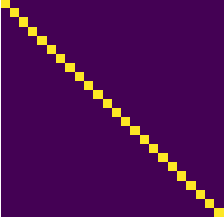

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolor(1 - sd.squareform(sd.pdist(loc[:, include], 'correlation')))
ax.invert_yaxis()
ax.axis('off');
fig.savefig(fig_dir / 'sample_rsm_loc.png', pad_inches=0)

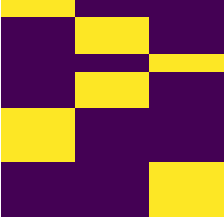

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolor(cat)
ax.invert_yaxis()
ax.axis('off');
fig.savefig(fig_dir / 'pattern_cat.png', pad_inches=0)

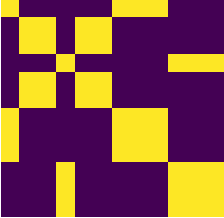

In [19]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolor(1 - sd.squareform(sd.pdist(cat, 'correlation')))
ax.invert_yaxis()
ax.axis('off');
fig.savefig(fig_dir / 'sample_rsm_cat.png', pad_inches=0)

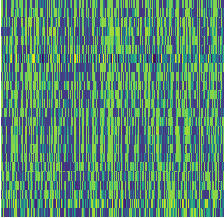

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolor(use)
ax.invert_yaxis()
ax.axis('off');
fig.savefig(fig_dir / 'pattern_use.png', pad_inches=0)

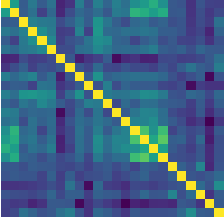

In [21]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolor(1 - sd.squareform(sd.pdist(use, 'correlation')))
ax.invert_yaxis()
ax.axis('off');
fig.savefig(fig_dir / 'sample_rsm_use.png', pad_inches=0)

In [22]:
for i, item in l1['item'].items():
    print(item)

SEAN PENN
AUDREY HEPBURN
ST PATRICKS CATHEDRAL
LES INVALIDES
GREAT ZIMBABWE RUINS
BRYCE CANYON
TROPHY
BRUSH
SUPREME COURT
SAN FRANCISCO
TREVI FOUNTAIN
TAHITI
ANDRE3000
NICOLAS CAGE
JUSTIN TIMBERLAKE
JULIA ROBERTS
LEBRON JAMES
JOHN MCCAIN
GLASS
KLEENEX
BLENDER
HELMET
CHAIR
BRICK


In [23]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

sklearn   : 0.24.1
cymr      : 0.11.2
mindstorm : 0.8.1
matplotlib: 3.5.2
psifr     : 0.8.0
pandas    : 1.4.2
cfr       : 0.1.0
numpy     : 1.21.4
scipy     : 1.7.1

